# Finite State Machine Generator

This notebook will show how to use the Finite State Machine (FSM) Generator to generate a state machine. The FSM we will build is a Gray code counter.  The counter has three state bits and can count up or down through eight states.  The counter outputs are Gray coded, meaning that there is only a single-bit transition between the output vector of any state and its next states. 

### Step 1: Download the `logictools` overlay

In [12]:
from pynq.overlays.logictools import LogicToolsOverlay
from pynq.lib.logictools import FSMGenerator

logictools_olay = LogicToolsOverlay('logictools.bit')

Specifiy your pins states and transistions here:

In [13]:
fsm_spec = {'inputs': [('reset','D0'), ('direction','D1')],
            'outputs': [('bit2','D3'), ('bit1','D4'), ('bit0','D5')],
            'states': ['State0', 'State1', 'State2', 'State3', 'State4', 'State5', 'State6', 'State7'],
            'transitions': [['01', 'State1', 'State0', '000'],
                            ['00', 'State0', 'State1', '000'],
                            ['01', 'State2', 'State1', '001'],
                            ['00', 'State0', 'State1', '001'],
                            ['01', 'State3', 'State2', '011'],
                            ['00', 'State1', 'State2', '011'],
                            ['01', 'State4', 'State3', '010'],
                            ['00', 'State2', 'State3', '010'],
                            ['01', 'State5', 'State4', '110'],
                            ['00', 'State3', 'State4', '110'],
                            ['01', 'State6', 'State5', '111'],
                            ['00', 'State4', 'State5', '111'],
                            ['01', 'State7', 'State6', '101'],
                            ['00', 'State5', 'State6', '101'],
                            ['01', 'State0', 'State7', '100'],
                            ['00', 'State6', 'State7', '100'],
                            ['11', '*',  'State5', '']]}   

### Step 2: Specify the FSM

__Notes on the FSM specification format__

![](./images/fsm_spec_format.png)

### Step 3: Instantiate the FSM generator object

In [14]:
fsm_generator = logictools_olay.fsm_generator

In this notebook, the trace analyzer is used to check the inputs and outputs of the FSM.

The trace analyzer is controlled by calling the `trace()` method.

In [15]:
fsm_generator.trace()

### Step 5: Setup the FSM generator
The FSM generator will work at the default frequency of 10MHz. This can be modified using a `frequency` argument in the `setup()` method.

In [16]:
fsm_generator.setup(fsm_spec)

__Display the FSM state diagram__   
This method should only be called after the generator has been properly set up.

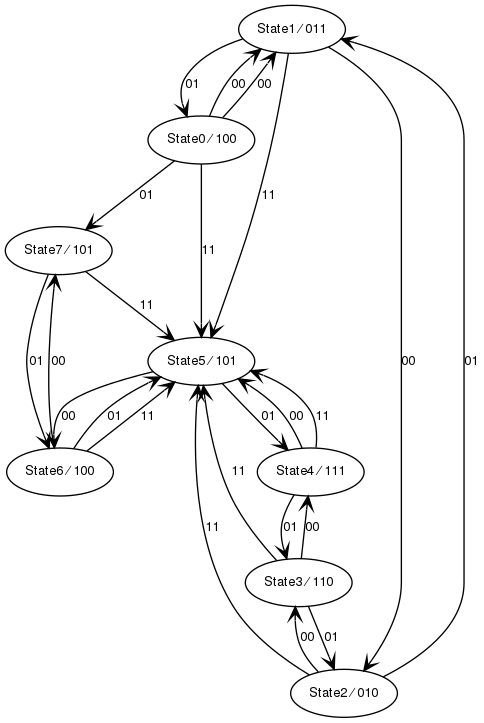

In [17]:
fsm_generator.show_state_diagram()

__Set up the FSM inputs on the PYNQ board__
* Check that the reset and direction inputs are correctly wired on the PYNQ board, as shown below:

|  | PYNQ-Z1 | PYNQ-Z2 |
|--|---------|---------|
| GND | D0 | AR0 |
| 3.3V | D1 | AR1 |

![](./images/fsm_wiring.png)

__Notes:__
    
* The 3-bit Gray code counter is an up-down, wrap-around counter that will count from states 000 to 100 in either ascending or descending order    


* The reset input is connected to pin D0/AR0 of the Arduino connector
    * Connect the reset input to GND for normal operation 
    * When the reset input is set to logic 1 (3.3V), the counter resets to state 000
    

* The direction input is connected to pin D1/AR1 of the Arduino connector
    * When the direction is set to logic 0, the counter counts down
    * Conversely, when the direction input is set to logic 1, the counter counts up

### Step 6: Run and display waveform

The ` run()` method will execute all the samples, `show_waveform()` method is used to display the waveforms

In [18]:
fsm_generator.run()
fsm_generator.show_waveform()

#### Verify the trace output against the expected Gray code count sequence

| State | FSM output bits: bit2, bit1, bit0        |
|:-----:|:----------------------------------------:|
| s0    | 000                                      |
| s1    | 001                                      |
| s2    | 011                                      |
| s3    | 010                                      |
| s4    | 110                                      |
| s5    | 111                                      |
| s6    | 101                                      |
| s7    | 100                                      |




### Step 7: Stop the FSM generator
Calling `stop()` will clear the logic values on output pins; however, the waveform will be recorded locally in the FSM instance.

In [10]:
fsm_generator.stop()